In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import os

In [3]:
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors

In [4]:
import matplotlib.animation as animation

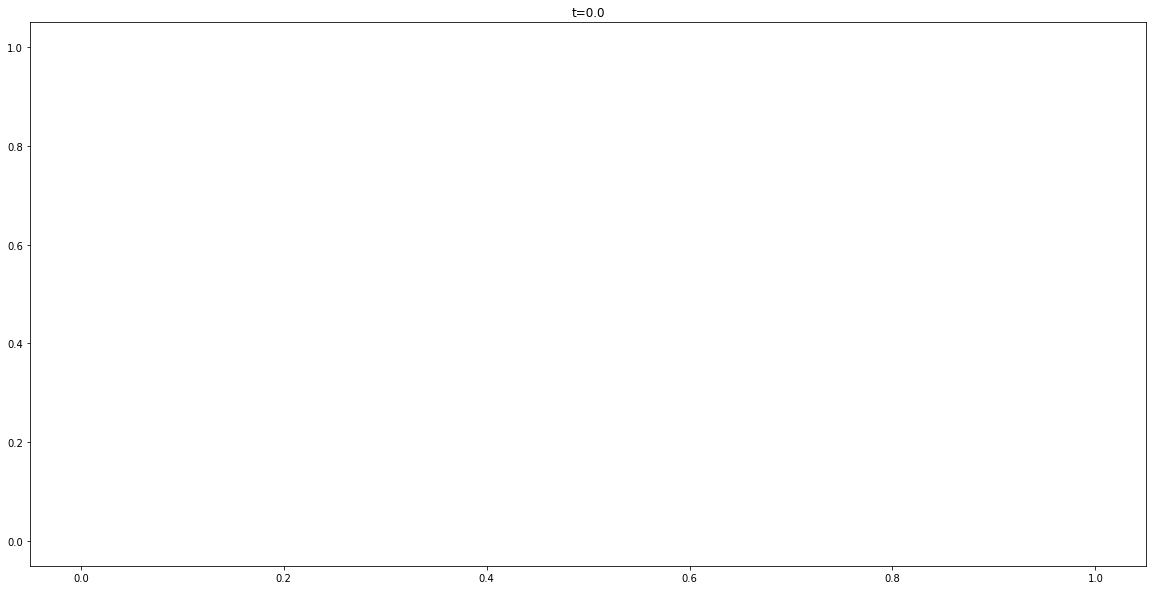

In [13]:
tgap = 20
tmax=10000
rho0=5
lx=100
beta=2.5
D=0.5
prof=pd.read_csv('films_D/D0.03/f_profiles.dat.gz', sep=' ', names=['x', 'rho', 'm'])
mag=pd.read_csv('f_mag.dat', sep=' ', names=['t', 'M'], index_col=False)

rho=prof.rho.values.reshape(-1,lx)
m=prof.m.values.reshape(-1,lx)

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

frame=0

img, = plt.plot(m[frame])
t = plt.title('t=%.1f'%mag.t[frame])


ma=np.max(rho)

plt.show()

In [27]:
prof=pd.read_csv('films_D/D0.03/f_profiles.dat.gz', sep='\t', names=['x', 'rho', 'm'])

In [30]:
t=np.loadtxt('films_D/D0.03/f_profiles.dat.gz')

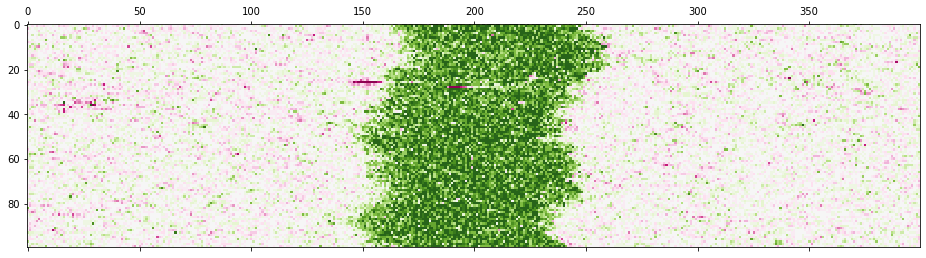

In [40]:
t0=-5
v0=10
plt.matshow(t[t0*100:(t0+1)*100,:400], cmap='PiYG', vmin=-v0, vmax=v0)

# Films varying $\varepsilon$

In [110]:
list_eps=np.linspace(0.1, 1, 10)

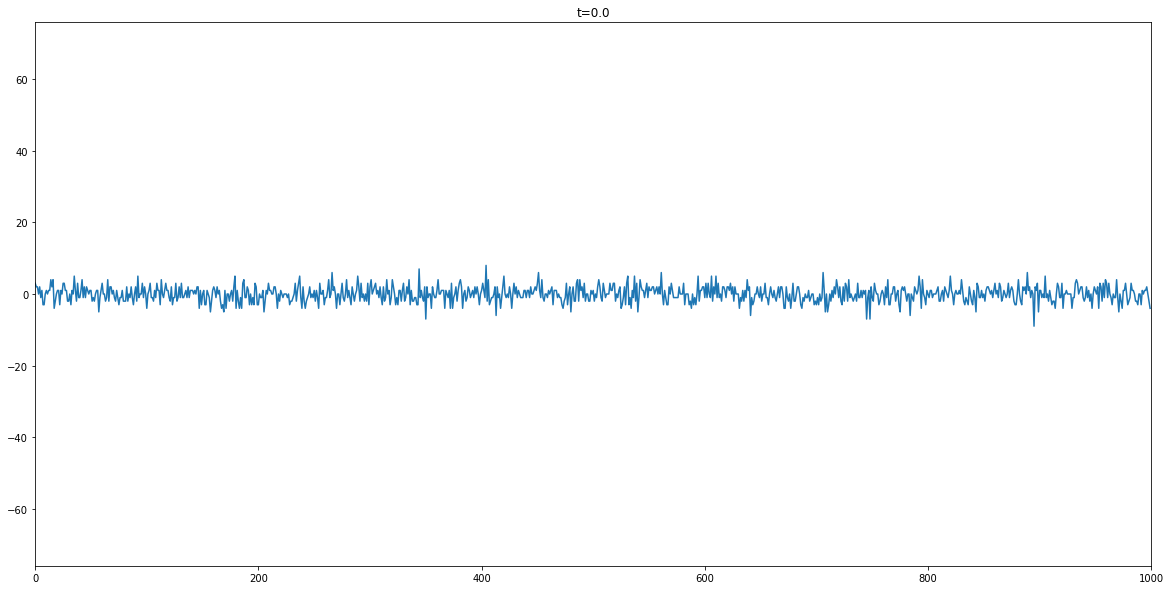

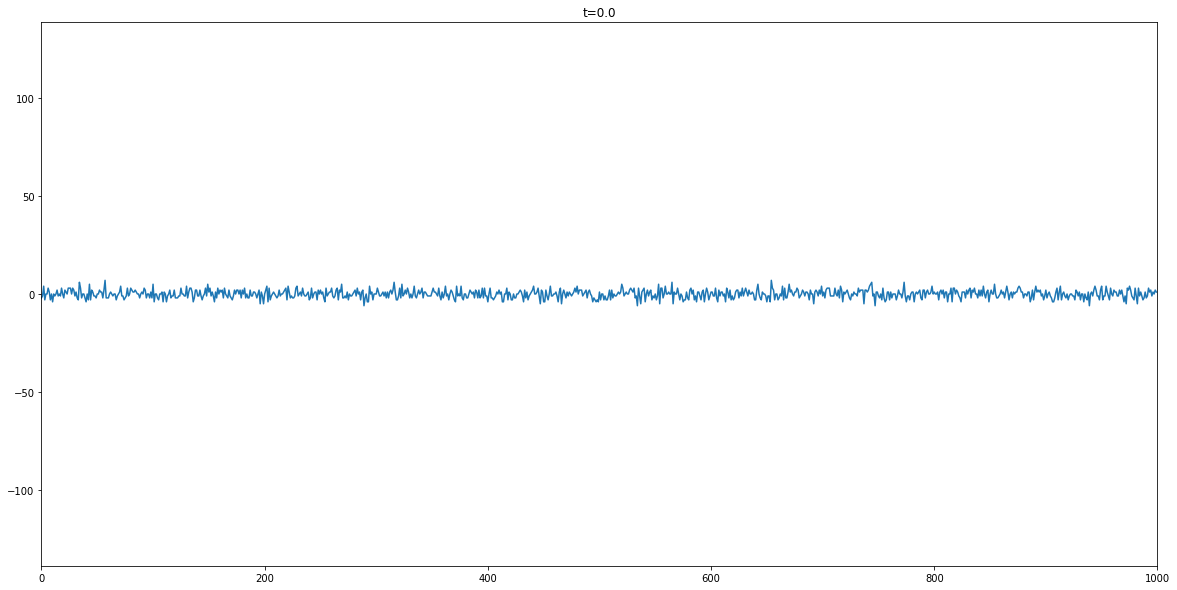

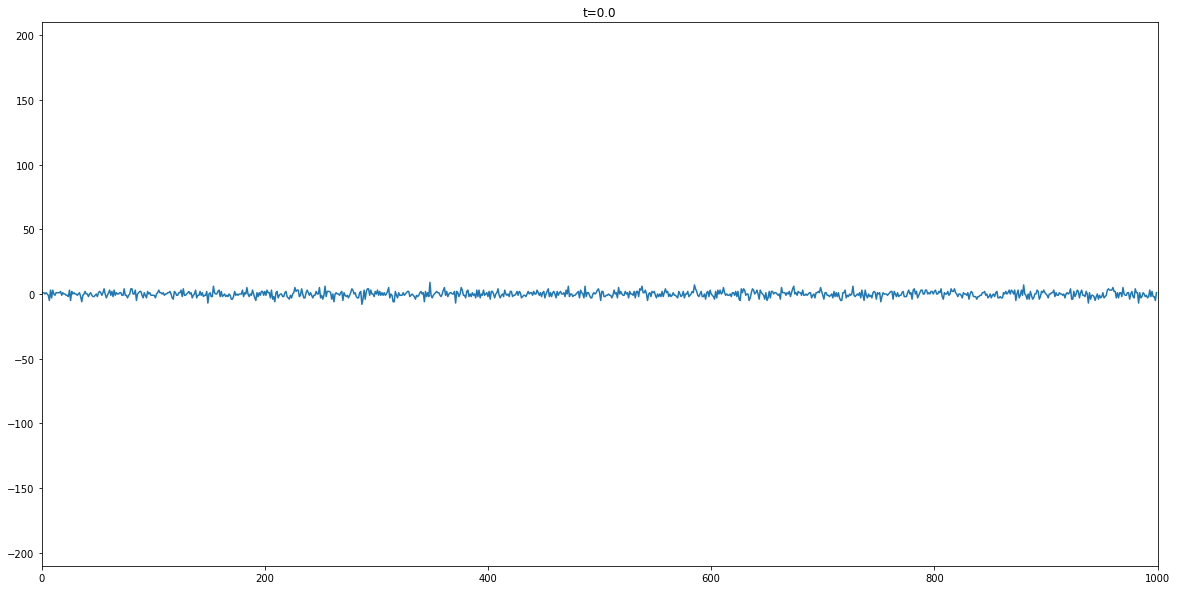

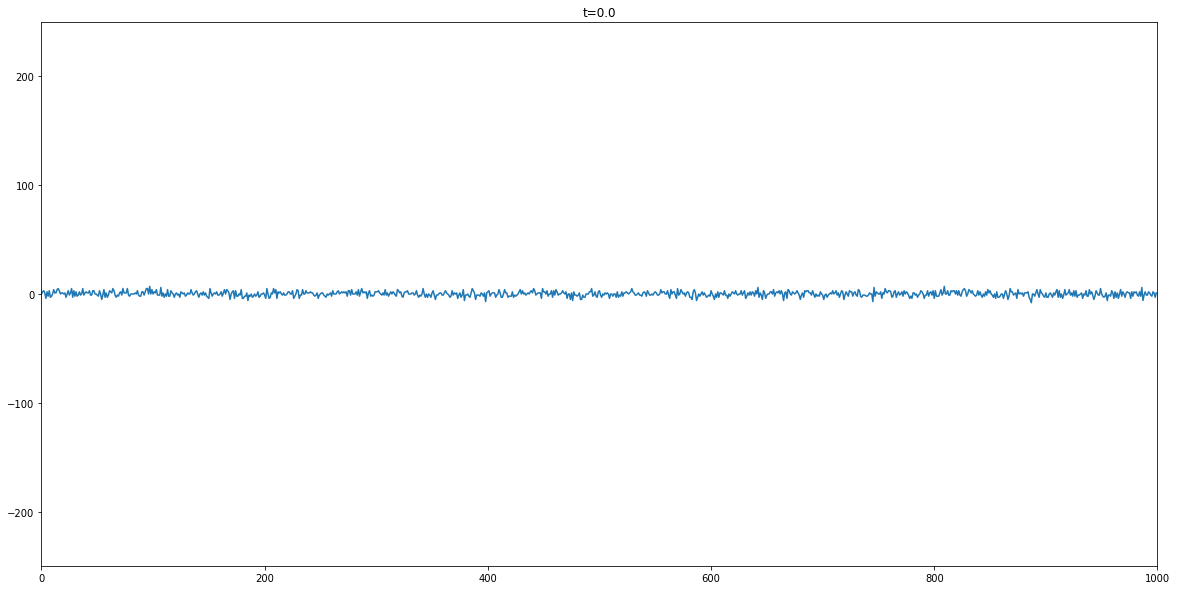

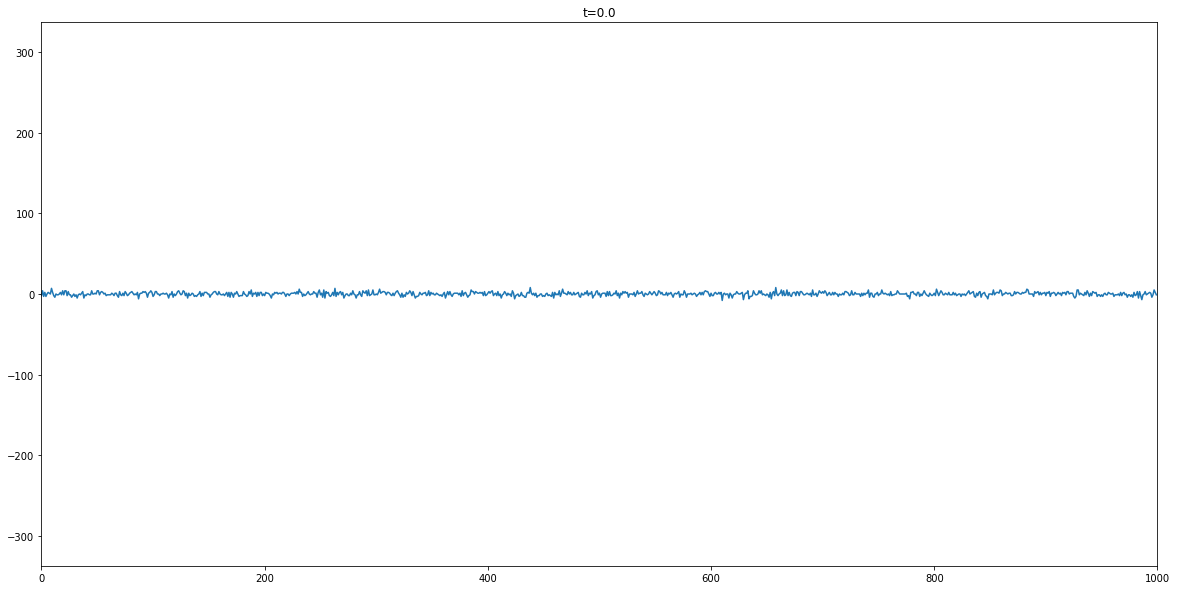

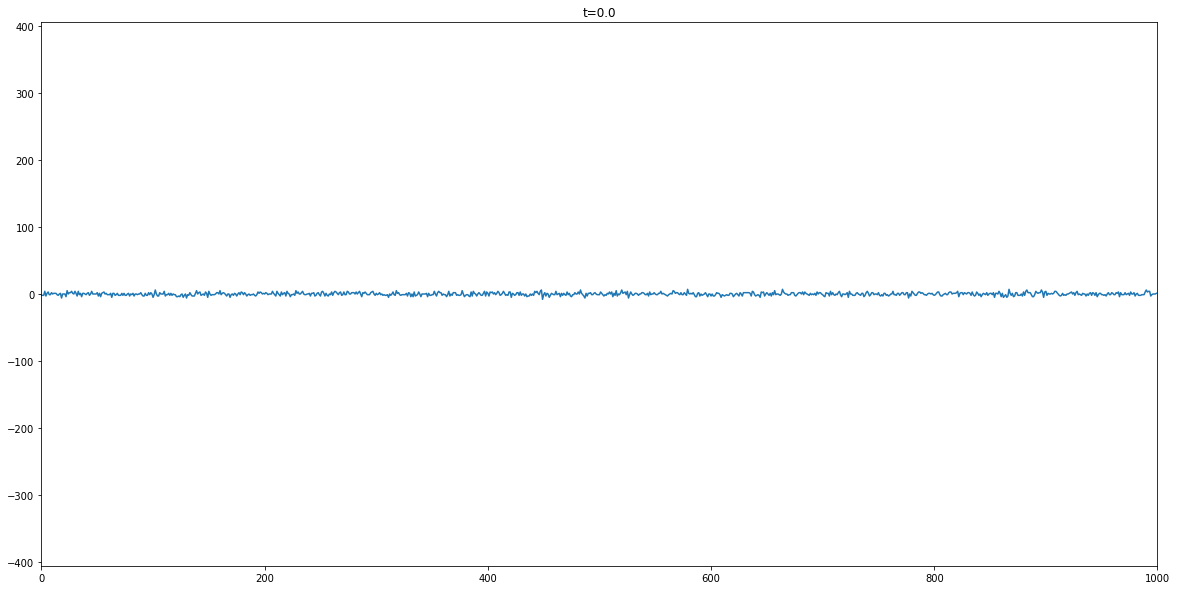

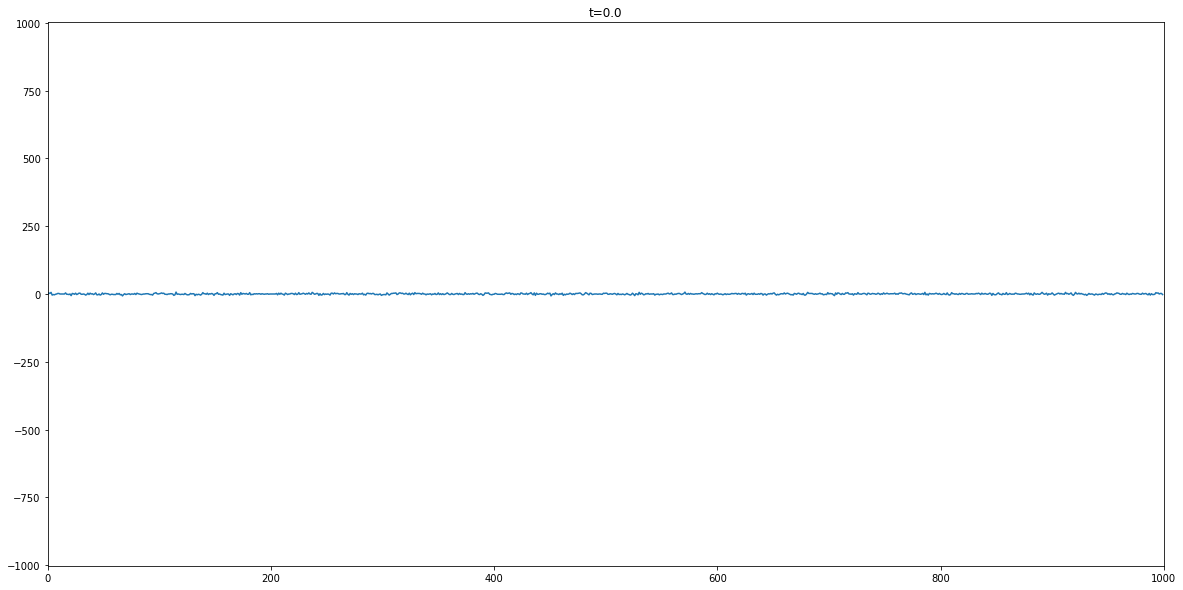

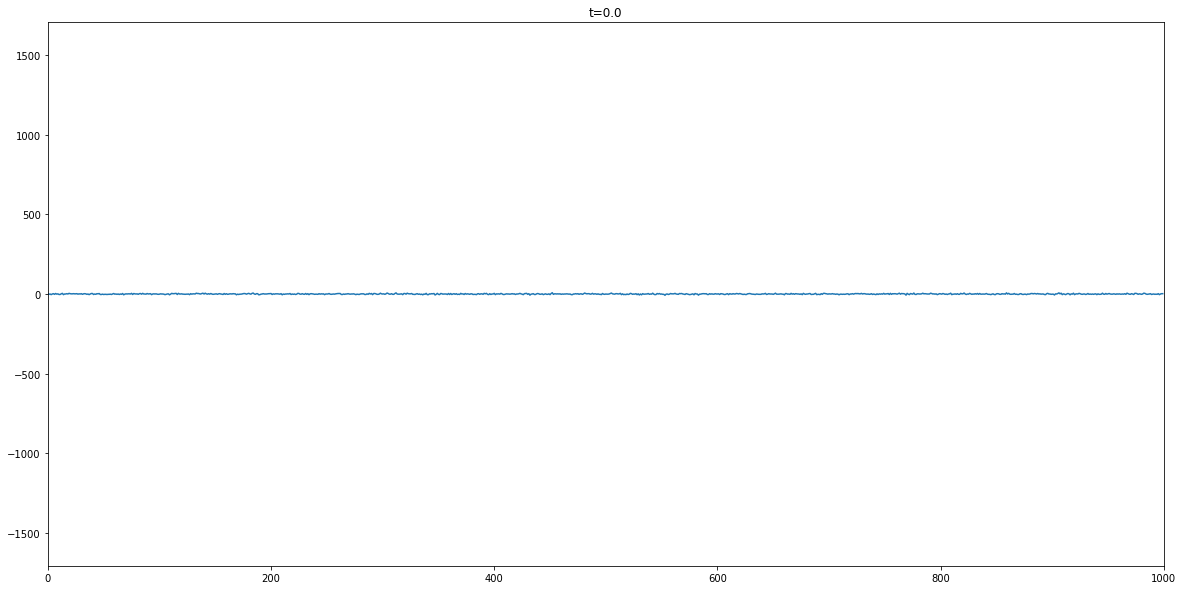

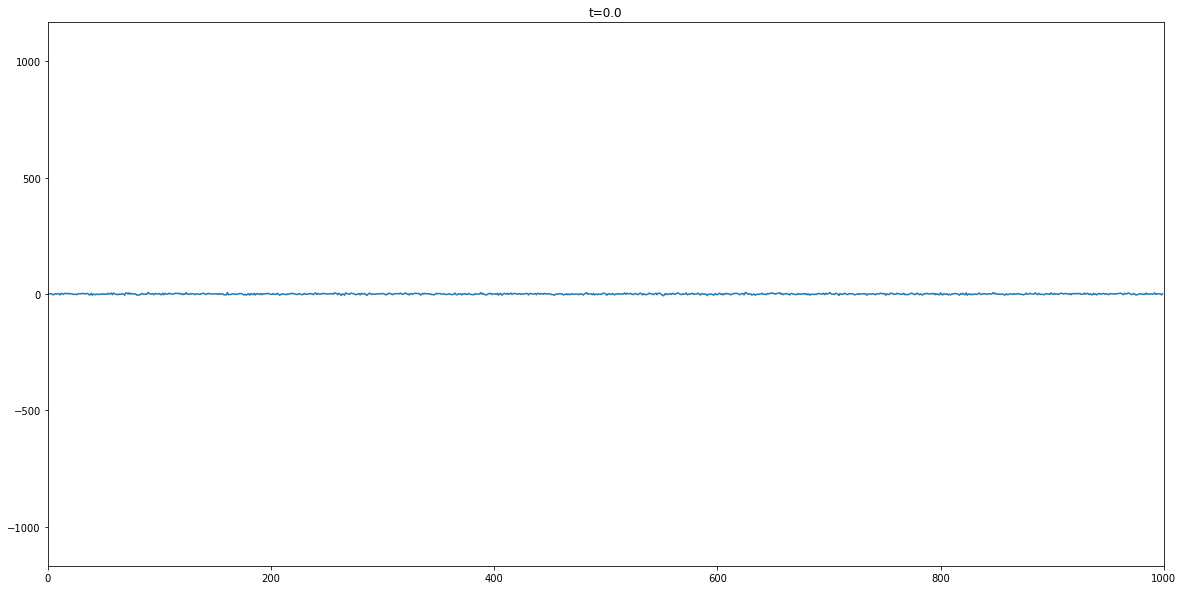

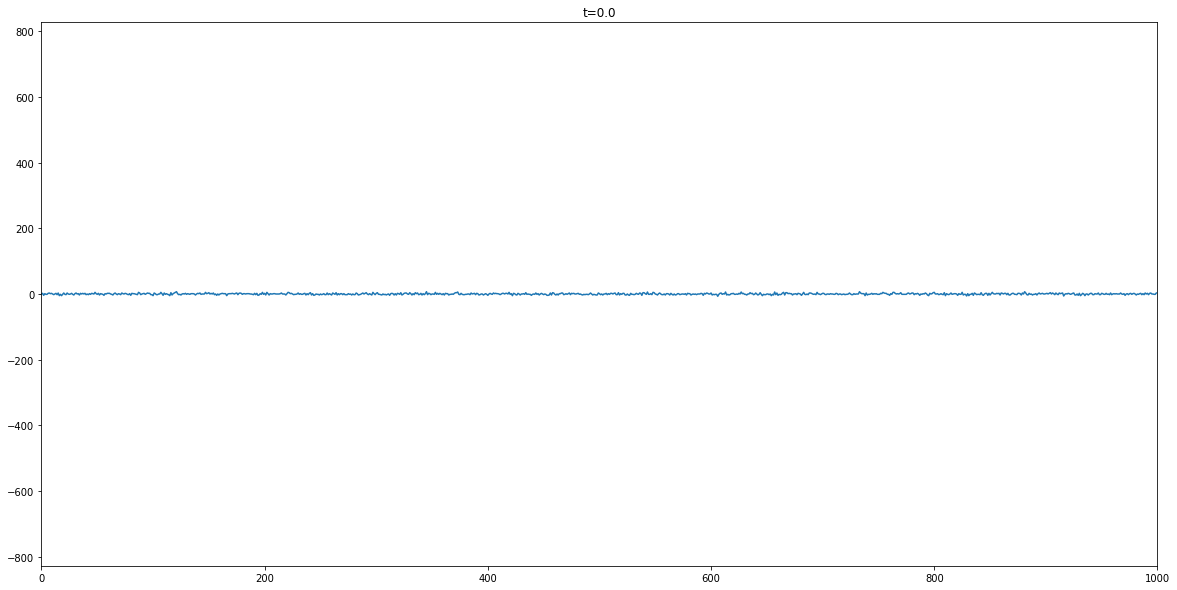

In [129]:
tgap = 20
tmax=10000
rho0=5
lx=1000
beta=2.5
D=0.5

direct='film_rho%.1f_lx%.1f_beta%.2f_D%.2f'%(rho0, lx, beta, D)
os.mkdir(direct)

for eps in list_eps:
    with open('f_input.dat', 'w') as f:
        f.write('tgap = %d tmax = %d rho0 = %f lx = %d w0 = 1 beta = %f D = %f eps = %f'%(tgap, tmax, rho0, lx, beta, D, eps))

    bashCommand = "./activeIsing"
    popen = subprocess.Popen(bashCommand, stdout=subprocess.PIPE)
    popen.wait()
    output = popen.stdout.read()
    
    prof=pd.read_csv('f_profiles.dat', sep=' ', names=['x', 'rho', 'm'])
    mag=pd.read_csv('f_mag.dat', sep=' ', names=['t', 'M'], index_col=False)

    rho=prof.rho.values.reshape(-1,lx)
    m=prof.m.values.reshape(-1,lx)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(20,10)

    frame=0

    img, = plt.plot(m[frame])
    t = plt.title('t=%.1f'%mag.t[frame])


    ma=np.max(rho)
    plt.ylim(-ma,ma)
    plt.xlim(0,lx)

    plt.show()

    def update(*args):
        global frame

        img.set_data(np.arange(lx), m[frame])
        t.set_text('t=%.1f'%mag.t[frame])
        frame += 1

        return img,

    ani = animation.FuncAnimation(fig, update, 499)
    writer = animation.FFMpegWriter(fps=20)

    ani.save(direct+'/film_rho%.1f_lx%.1f_beta%.2f_D%.2f_eps%.2f.avi'%(rho0, lx, beta, D, eps), writer=writer) 

In [ ]:
# Films varying $\varepsilon$

list_eps=np.linspace(0.1, 1, 10)

tgap = 20
tmax=10000
rho0=5
lx=1000
beta=2.5
D=0.5

direct='film_rho%.1f_lx%.1f_beta%.2f_D%.2f'%(rho0, lx, beta, D)
os.mkdir(direct)

for eps in list_eps:
    with open('f_input.dat', 'w') as f:
        f.write('tgap = %d tmax = %d rho0 = %f lx = %d w0 = 1 beta = %f D = %f eps = %f'%(tgap, tmax, rho0, lx, beta, D, eps))

    bashCommand = "./activeIsing"
    popen = subprocess.Popen(bashCommand, stdout=subprocess.PIPE)
    popen.wait()
    output = popen.stdout.read()
    
    prof=pd.read_csv('f_profiles.dat', sep=' ', names=['x', 'rho', 'm'])
    mag=pd.read_csv('f_mag.dat', sep=' ', names=['t', 'M'], index_col=False)

    rho=prof.rho.values.reshape(-1,lx)
    m=prof.m.values.reshape(-1,lx)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(20,10)

    frame=0

    img, = plt.plot(m[frame])
    t = plt.title('t=%.1f'%mag.t[frame])


    ma=np.max(rho)
    plt.ylim(-ma,ma)
    plt.xlim(0,lx)

    plt.show()

    def update(*args):
        global frame

        img.set_data(np.arange(lx), m[frame])
        t.set_text('t=%.1f'%mag.t[frame])
        frame += 1

        return img,

    ani = animation.FuncAnimation(fig, update, 499)
    writer = animation.FFMpegWriter(fps=20)

    ani.save(direct+'/film_rho%.1f_lx%.1f_beta%.2f_D%.2f_eps%.2f.avi'%(rho0, lx, beta, D, eps), writer=writer) 